In [32]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [26]:
data_dir = './data/'
input_filename = 'train-volume.tif'
label_filename = 'train-labels.tif'

In [27]:
image_input = Image.open(os.path.join(data_dir, input_filename))
image_label = Image.open(os.path.join(data_dir, label_filename))

In [29]:
width, height = image_input.size
n_frames = image_input.n_frames

In [30]:
nframe_train = 24
nframe_val = 3
nframe_test = 3
assert nframe_train + nframe_val + nframe_test == n_frames

In [37]:
if not os.path.exists(os.path.join(data_dir, 'train')):
    os.makedirs(os.path.join(data_dir, 'train'))
if not os.path.exists(os.path.join(data_dir, 'val')):
    os.makedirs(os.path.join(data_dir, 'val'))
if not os.path.exists(os.path.join(data_dir, 'test')):
    os.makedirs(os.path.join(data_dir, 'test'))

In [38]:
id_frame_list = np.arange(n_frames)
np.random.shuffle(id_frame_list)

In [73]:
offset_id_frame = 0

In [74]:
for id_frame_idx in range(nframe_train):
    image_input.seek(id_frame_list[id_frame_idx])
    image_label.seek(id_frame_list[id_frame_idx])

    img_input = np.asarray(image_input)
    img_label = np.asarray(image_label)

    np.save(os.path.join(data_dir, 'train', f'input_{id_frame_idx:03d}'), img_input)
    np.save(os.path.join(data_dir, 'train', f'label_{id_frame_idx:03d}'), img_label)

In [75]:
offset_id_frame += nframe_train

In [76]:
for id_frame_idx in range(nframe_val):
    image_input.seek(id_frame_list[id_frame_idx + offset_id_frame])
    image_label.seek(id_frame_list[id_frame_idx + offset_id_frame])

    img_input = np.asarray(image_input)
    img_label = np.asarray(image_label)

    np.save(os.path.join(data_dir, 'val', f'input_{id_frame_idx:03d}'), img_input)
    np.save(os.path.join(data_dir, 'val', f'label_{id_frame_idx:03d}'), img_label)

In [77]:
offset_id_frame += nframe_val

In [78]:
for id_frame_idx in range(nframe_val):
    image_input.seek(id_frame_list[id_frame_idx + offset_id_frame])
    image_label.seek(id_frame_list[id_frame_idx + offset_id_frame])

    img_input = np.asarray(image_input)
    img_label = np.asarray(image_label)

    np.save(os.path.join(data_dir, 'test', f'input_{id_frame_idx:03d}'), img_input)
    np.save(os.path.join(data_dir, 'test', f'label_{id_frame_idx:03d}'), img_label)

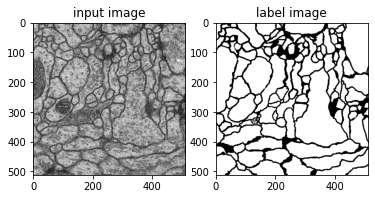

In [80]:
plt.subplot(121)
plt.imshow(img_input, cmap='gray')
plt.title('input image')

plt.subplot(122)
plt.imshow(img_label, cmap='gray')
plt.title('label image')

plt.show()